In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import math
from timeit import default_timer as timer

In [4]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 
              'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

#sales = pd.read_csv("C:/Users/Witek/PycharmProjects/test/Coursera/House price prediction/kc_house_data_small.csv", 
#                    dtype=dtype_dict)

#train, test, validation = np.split(sales.sample(frac=1), [int(.64*len(sales)), int(.8*len(sales))])

In [5]:
train = pd.read_csv("./kc_house_data_small_train.csv", dtype=dtype_dict)

test = pd.read_csv("./kc_house_data_small_test.csv", dtype=dtype_dict)

validation = pd.read_csv("./kc_house_data_validation.csv", dtype=dtype_dict)


In [156]:
feature_list = ['bedrooms',  
                'bathrooms',  
                'sqft_living',  
                'sqft_lot',  
                'floors',
                'waterfront',  
                'view',  
                'condition',  
                'grade',  
                'sqft_above',  
                'sqft_basement',
                'yr_built',  
                'yr_renovated',  
                'lat',  
                'long',  
                'sqft_living15',  
                'sqft_lot15']

In [157]:
def normalize_fn(x):
    return math.sqrt(sum(x ** 2))

In [158]:
train_np = train[feature_list].as_matrix()
test_np = test[feature_list].as_matrix()
validation_np = validation[feature_list].as_matrix()

train_out = train["price"].as_matrix()
test_out = test["price"].as_matrix()
validation_out = validation["price"].as_matrix()

In [150]:
def get__normalizator(data):
    
    #normalizator = np.apply_along_axis(normalize_fn, 0, data)
    norms = np.linalg.norm(data, axis=0)
    return norms

In [151]:
normalizator = get__normalizator(train_np)

train_norm = train_np / normalizator
test_norm = test_np / normalizator
validation_norm = validation_np / normalizator

In [132]:
normalizator

array([  2.57850732e+02,   1.65977596e+02,   1.67688695e+05,
         3.11491224e+06,   1.17240138e+02,   6.32455532e+00,
         5.87962584e+01,   2.57906960e+02,   5.75318173e+02,
         1.45365513e+05,   3.90863965e+04,   1.46559338e+05,
         2.99361461e+04,   3.53588887e+03,   9.08552952e+03,
         1.55531640e+05,   2.46533053e+06])

In [192]:
def compute_distances(train_matrix, query_vector):
    diff = train_matrix - query_vector
    
    distances = np.sqrt(np.sum(diff**2, axis = 1))
    return distances

In [193]:
def compute_k_nearest_neighbors(k, features_matrix, feature_vector):
    distances = compute_distances(features_matrix, feature_vector)
    return np.argsort(distances, axis = 0)[:k]

In [194]:
compute_k_nearest_neighbors(4, train_norm, test_norm[2])

array([ 382, 1149, 4087, 3142], dtype=int64)

In [195]:
def make_prediction(k, features_matrix, feature_vector, y_vector):
    t = compute_k_nearest_neighbors(k, features_matrix, feature_vector)
    
    return np.mean(y_vector[t])
    

In [196]:
make_prediction(4, train_norm, test_norm[2], train_out)

413987.5

In [197]:
def prediction_for_all(k, features_matrix, feature_vector, y_vector):
    
    output = []
    
    for item in feature_vector:
        t = make_prediction(k, features_matrix, item, y_vector)
        output.append(t)
        
    return output

In [198]:
def find_best_k(k_end, test_out):

    output = pd.DataFrame(columns = ["RSS", "time"], index = range(1, k_end))

    for i in range(1,k_end):
        start = timer()

        temp = prediction_for_all(i, train_norm, test_norm, train_out)
        rss = np.sqrt(sum((temp - test_out)**2)) / sum(test_out)
        
        end = timer()
        
        output["RSS"].loc[i] = rss
        output["time"].loc[i] = end - start
    
    return output

In [201]:
temp = find_best_k(16, test_out)

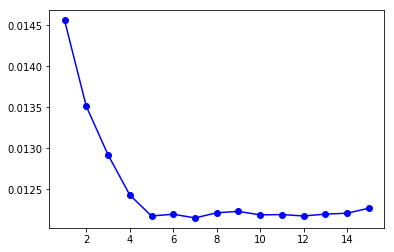

In [202]:
plt.plot(temp["RSS"],'bo-')

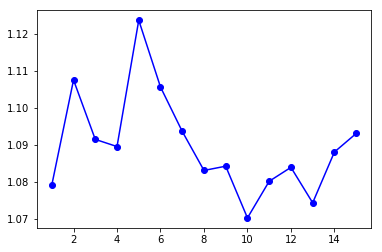

In [203]:
plt.plot(temp["time"],'bo-')